In [ ]:
from tensorflow.keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(-1,28,28,1) / 255.0
X_test  = X_test.reshape(-1,28,28,1) / 255.0

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28, 1) (60000,)
Test : (10000, 28, 28, 1) (10000,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [6]:
from tensorflow.keras.datasets import mnist

# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Add channel dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Class distribution in training set:
Class 0: 5923 samples
Class 1: 6742 samples
Class 2: 5958 samples
Class 3: 6131 samples
Class 4: 5842 samples
Class 5: 5421 samples
Class 6: 5918 samples
Class 7: 6265 samples
Class 8: 5851 samples
Class 9: 5949 samples


/tmp/ipython-input-950634203.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="viridis")


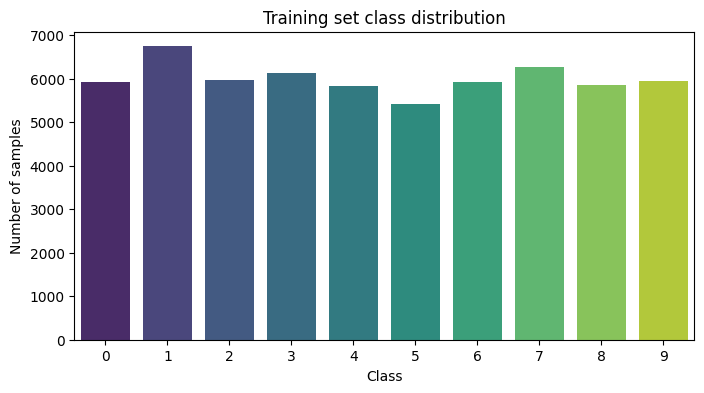

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution in training set:")
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} samples")


plt.figure(figsize=(8,4))
sns.barplot(x=unique, y=counts, palette="viridis")
plt.title("Training set class distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 - 5s - 11ms/step - accuracy: 0.9208 - loss: 0.2747
Epoch 2/5
469/469 - 5s - 10ms/step - accuracy: 0.9687 - loss: 0.1042
Epoch 3/5
469/469 - 3s - 7ms/step - accuracy: 0.9789 - loss: 0.0688
Epoch 4/5
469/469 - 3s - 7ms/step - accuracy: 0.9854 - loss: 0.0486
Epoch 5/5
469/469 - 5s - 11ms/step - accuracy: 0.9881 - loss: 0.0374
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MLP Accuracy: 0.9780, F1-score: 0.9780


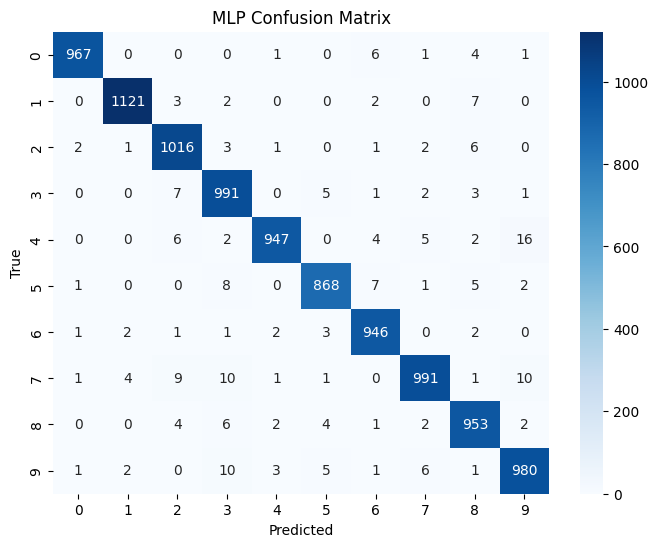

In [ ]:
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Prepare data for MLP 
X_train_mlp = X_train.reshape(-1, 28*28)
X_test_mlp = X_test.reshape(-1, 28*28)

# Build MLP model
mlp = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train MLP 
mlp.fit(X_train_mlp, y_train, epochs=5, batch_size=128, verbose=2)

# Evaluate MLP
y_pred_mlp = np.argmax(mlp.predict(X_test_mlp), axis=1)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

print(f"MLP Accuracy: {acc_mlp:.4f}, F1-score: {f1_mlp:.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 - 85s - 101ms/step - accuracy: 0.9346 - loss: 0.2196 - val_accuracy: 0.9808 - val_loss: 0.0680
Epoch 2/5
844/844 - 72s - 85ms/step - accuracy: 0.9738 - loss: 0.0896 - val_accuracy: 0.9898 - val_loss: 0.0329
Epoch 3/5
844/844 - 80s - 95ms/step - accuracy: 0.9796 - loss: 0.0670 - val_accuracy: 0.9887 - val_loss: 0.0444
Epoch 4/5
844/844 - 83s - 98ms/step - accuracy: 0.9835 - loss: 0.0555 - val_accuracy: 0.9887 - val_loss: 0.0395
Epoch 5/5
844/844 - 81s - 96ms/step - accuracy: 0.9854 - loss: 0.0483 - val_accuracy: 0.9898 - val_loss: 0.0515


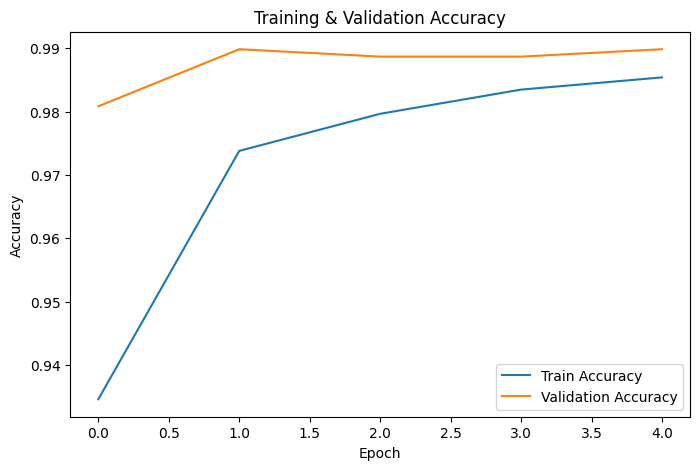

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
CNN Accuracy: 0.9891, F1-score: 0.9891


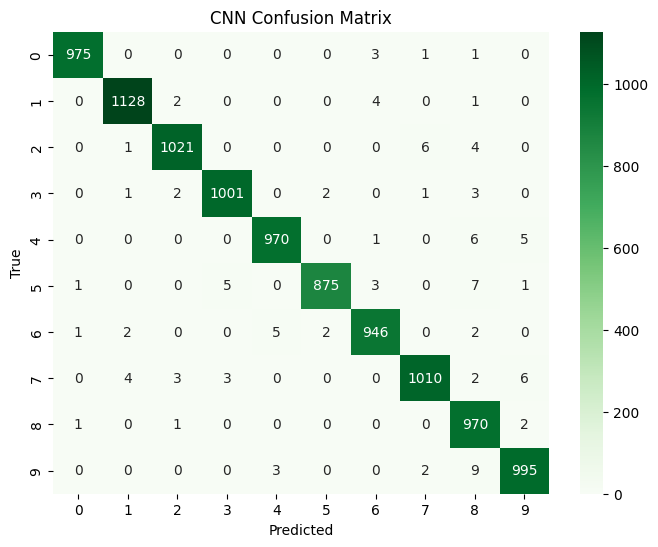

In [ ]:
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Build CNN model with Dropout and BatchNorm 
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train CNN with validation split 
history = cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)

#Plot Training & Validation Accuracy 
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

#  Evaluate CNN 
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)
acc_cnn = accuracy_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

print(f"CNN Accuracy: {acc_cnn:.4f}, F1-score: {f1_cnn:.4f}")

#  Confusion Matrix 
plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


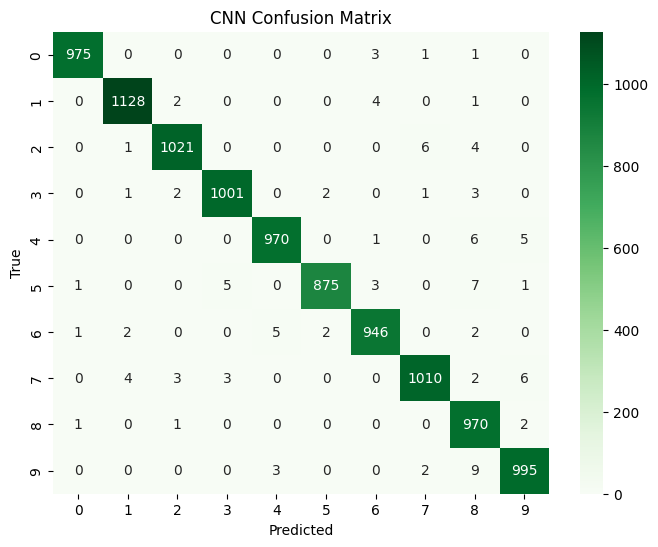

Total misclassified samples: 109


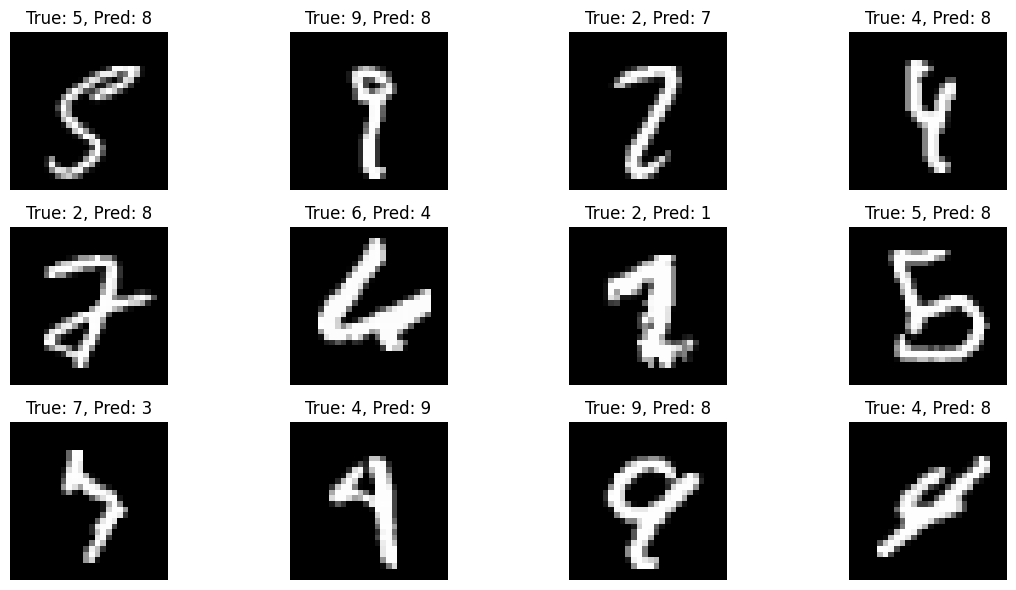

Most common misclassifications (True -> Pred):
9 -> 8 : 9 times
5 -> 8 : 7 times
2 -> 7 : 6 times
4 -> 8 : 6 times
7 -> 9 : 6 times

Insight:
Most misclassifications occur between digits with similar shapes, e.g., 5->3 or 7->1. This demonstrates the model's high accuracy and highlights subtle challenges in handwritten digit recognition.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix

# Confusion Matrix  
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


misclassified_idx = np.where(y_pred_cnn != y_test)[0]
print(f"Total misclassified samples: {len(misclassified_idx)}")


plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx[:12]):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_cnn[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


error_pairs = [(y_test[i], y_pred_cnn[i]) for i in misclassified_idx]
error_counts = Counter(error_pairs)
print("Most common misclassifications (True -> Pred):")
for pair, count in error_counts.most_common(5):
    print(f"{pair[0]} -> {pair[1]} : {count} times")


print("\nInsight:")
print("Most misclassifications occur between digits with similar shapes, e.g., 5->3 or 7->1. "
      "This demonstrates the model's high accuracy and highlights subtle challenges in handwritten digit recognition.")
